In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data Collection

In [77]:
data = pd.read_csv("C:/Users/Spandana/Downloads/car data.csv") 
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [78]:
data.shape

(301, 9)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Data Preprocessing

In [80]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [81]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [82]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [83]:
x = data.drop(columns = ['Car_Name','Selling_Price'], axis=1)

In [84]:
y = pd.DataFrame(data['Selling_Price'])

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2)

MODEL : Linear Regression

In [86]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [87]:
y_pred =lr.predict(x_train)

r2 = metrics.r2_score(y_train, y_pred)
print("r2_score:", r2)

r2_score: 0.8799451660493715


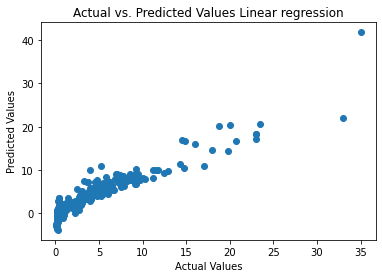

In [88]:
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Linear regression')
plt.show()

In [89]:
y_pred =lr.predict(x_test)

r2 = metrics.r2_score(y_test, y_pred)
print("r2_score:", r2)

r2_score: 0.8365766715025852


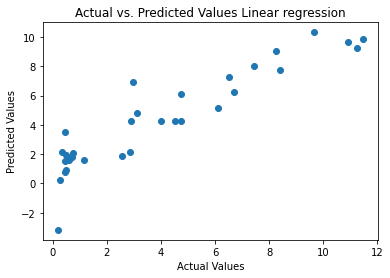

In [90]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Linear regression')
plt.show()

MODEL: Lasso Regression

In [91]:
lassor = Lasso()
lassor.fit(x_train,y_train)

Lasso()

In [92]:
y_pred =lassor.predict(x_train)

r2 = metrics.r2_score(y_train, y_pred)
print("r2_score:", r2)

r2_score: 0.8427856123435794


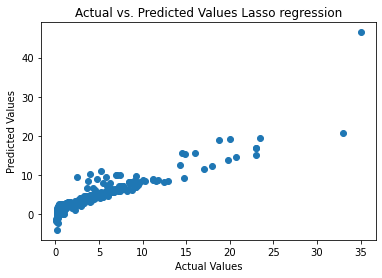

In [93]:
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Lasso regression')
plt.show()

In [94]:
y_pred =lassor.predict(x_test)

r2 = metrics.r2_score(y_test, y_pred)
print("r2_score:", r2)

r2_score: 0.8709167941173195


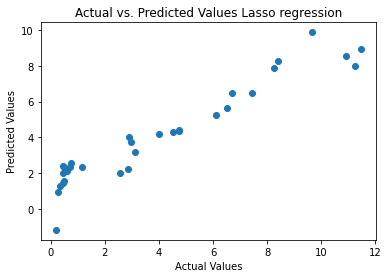

In [95]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Lasso regression')
plt.show()